# Sam Kole

## Research question/interests

I would like to investigate Mars' capacity to support life by examining the range of observed temperatures and pressures (as far as we know, for there to be life on a planet, there must be liquid water (at least some of the time), which would only be the case for certain temperature/pressure ranges) and by trying to make inferences about its atmosphere. I plan to approach this by comparing measured surface temperatures to the values that would be expected based on the flux from the Sun at Mars' location (if, for example, the temperature is higher than expected, this would suggest there is some greenhouse effect at work).

Depending on how much time I have, I may also look for additional datasets to supplement the one we have chosen. Extreme weather on Mars woud be another interesting topic to explore, but unfortunately the wind speed data was unavailable. I am also interested in Mars' average temperatures by season and year.

In [42]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv("../data/raw/mars-weather.csv")
data_raw

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


# Milestone 3
## Task 1: EDA

First, I'll look at the shape and general trends in the data:

In [3]:
data_raw.shape

(1894, 10)

In [4]:
data_raw.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [5]:
data_raw.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


In [6]:
data_raw.nunique()

id                  1894
terrestrial_date    1894
sol                 1894
ls                   360
month                 12
min_temp              29
max_temp              46
pressure             199
wind_speed             0
atmo_opacity           2
dtype: int64

Examining the atmo_opacity column further,

In [7]:
data_raw.atmo_opacity.unique()

array(['Sunny', '--'], dtype=object)

Clearly neither this column nor the wind_speed column don't offer any useful information. The id column isn't useful to me either, since every row already has its own unique index. I'll remove these in Task 2.
I'm interested in whether Mars can potentially support life based on this data, so I'm primarily interested in the temperature. I'll do a few plots to get a visual idea of the trends:

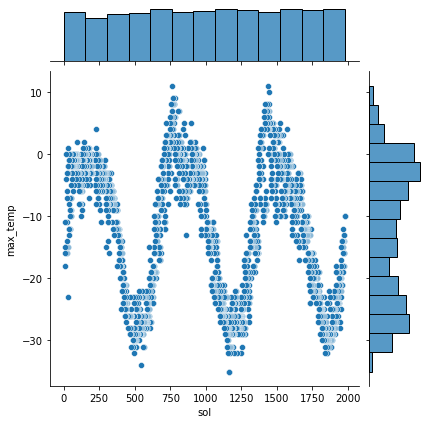

In [48]:
sns.jointplot(x='sol',y='max_temp', data=data_raw)

The max temp is given in degrees C, and sol is the number of Matrian days (sols) elapsed since the Curiosity rover landed.
From this plot, I can see clear seasonal trends in the maximum temperature, and many of the values are well above 0 degrees Celsius, which is a plus if we're looking for habitability. The evenness of the bars on top indicate that the readings were taken regularly.

Next, I'll look at the relationship between pressure and temperature. First, seasonal pressure:

In [ ]:
sns.barplot(

<AxesSubplot:xlabel='pressure', ylabel='max_temp'>

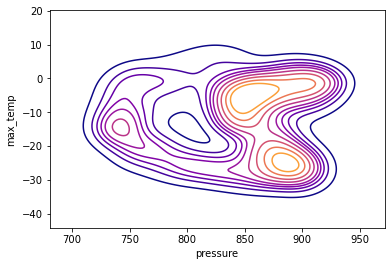

In [63]:
sns.kdeplot(x=data_raw['pressure'], y=data_raw['max_temp'], cmap='plasma')

From this plot, it seems that the pressure is relatively equal in the summer and winter (at the highest and lowest values of max_temp), but it drops for intermediate values, perhaps during seasonal transitions/spring/fall.

<AxesSubplot:xlabel='pressure', ylabel='sol'>

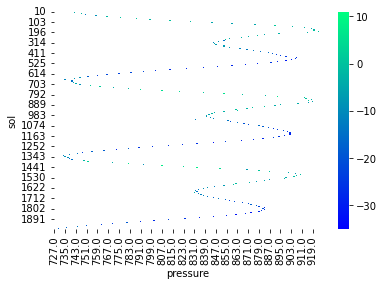

In [67]:
t = data_raw.pivot_table(index='sol', columns='pressure', values='max_temp')
sns.heatmap(t, cmap='winter')

#data_raw_mx = data_raw.corr()
#sns.heatmap(data_raw_mx, annot=True, cmap='plasma')

## Task 2: Data Analysis Pipeline

1. Load Data (already done)
1. Clean Data
- As I mentioned above, the 'id', 'atmo_opacity', and 'wind_speed' columns don't offer anything useful. So, I'll remove those columns as well as any rows containing nan values. I'll also remove the terrestrial_date column since it's not really relevant to my research interests.

In [33]:
data_clean = data_raw.copy().drop(['atmo_opacity','wind_speed', 'id', 'terrestrial_date'], axis=1).dropna(axis=0)
print(data_clean.shape)
data_clean.head()

(1867, 6)


,sol,ls,month,min_temp,max_temp,pressure
0,1977,135,Month 5,-77.0,-10.0,727.0
1,1976,135,Month 5,-77.0,-10.0,728.0
2,1975,134,Month 5,-76.0,-16.0,729.0
3,1974,134,Month 5,-77.0,-13.0,729.0
4,1973,133,Month 5,-78.0,-18.0,730.0


Now I'll rename the 'ls' column so that it makes more intuitive sense to me, and change the months to just numerical values.

In [32]:
data_clean.rename(columns={'ls':'solar_longitude'})
mNames = [(f"Month {x}") for x in range(1,13)]
data_clean['month'].replace(mNames, list(range(1,13)), inplace=True)
data_clean

,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure
0,2018-02-27,1977,135,5,-77.0,-10.0,727.0
1,2018-02-26,1976,135,5,-77.0,-10.0,728.0
2,2018-02-25,1975,134,5,-76.0,-16.0,729.0
3,2018-02-24,1974,134,5,-77.0,-13.0,729.0
4,2018-02-23,1973,133,5,-78.0,-18.0,730.0
...,...,...,...,...,...,...,...
1887,2012-08-20,14,157,6,-74.0,-16.0,740.0
1888,2012-08-19,13,157,6,-74.0,-15.0,732.0
1889,2012-08-18,12,156,6,-76.0,-18.0,741.0
1890,2012-08-17,11,156,6,-76.0,-11.0,740.0


## Task 3: Method Chaining
Here, I will transfer the steps I performed to clean and process the data in Task 2 into a .py file.

In [68]:
import project_functions1 as p1

In [70]:
clean_data = p1.clean_df("../data/raw/mars-weather.csv")
clean_data

,sol,solar_longitude,month,min_temp,max_temp,pressure
0,1977,135,5,-77.0,-10.0,727.0
1,1976,135,5,-77.0,-10.0,728.0
2,1975,134,5,-76.0,-16.0,729.0
3,1974,134,5,-77.0,-13.0,729.0
4,1973,133,5,-78.0,-18.0,730.0
...,...,...,...,...,...,...
1887,14,157,6,-74.0,-16.0,740.0
1888,13,157,6,-74.0,-15.0,732.0
1889,12,156,6,-76.0,-18.0,741.0
1890,11,156,6,-76.0,-11.0,740.0


Nice and clean! This is exactly what I was trying to produce.

## Task 4: Data Analysis
See group notebook.